<a href="https://colab.research.google.com/github/SachinScaler/May25_MathsForML/blob/main/Optimization_3_Gradient_descent_in_action%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math

def get_derivate(func, x, delta=0.0001): #
    deriv = (func(x + delta) - func(x))/delta # ab intio wrt x
    return deriv


complex_func = lambda x: 2 * x**2  + math.log(3*x)
get_derivate(complex_func, 3) # let's complex_func derivate at x = 3

12.333527777919073

In [ ]:
simple_func = lambda x: x**2
get_derivate(simple_func, 3) # let's complex_func derivate at x = 3

6.000100000012054

In [ ]:
def get_partials(func, x, y, delta_x=0.0001, delta_y=0.0001):
    f_x = (func(x + delta_x, y) - func(x, y))/delta_x # ab intio wrt x
    f_y = (func(x, y + delta_y) - func(x, y))/delta_y # ab initio wrt y
    return [f_x, f_y]


In [ ]:
func = lambda x,y : x**2 + y**2 # f'x,y = [2x, 2y]
get_partials(func, 3, 4)

[6.000099999994291, 8.00009999998963]

In [ ]:
from math import log, e

func = lambda x1,x2 :log(x1) + (x1/x2)*e**(x1+x2)
get_partials(func, 3, 4)

[1097.035028517439, 616.8818546802868]

### f(x,y) = x^2 + y^2

### Let's calcuate partial derivates at lot of points

In [ ]:
import numpy as np


# creating 2d grid
def get_grid(axis_lim):
    x= np.linspace(-axis_lim, axis_lim, 20)
    y= np.linspace(-axis_lim, axis_lim, 20)
    g1,g2 = np.meshgrid(x,y)
    return g1,g2


axis_lim = 10
g1, g2 = get_grid(axis_lim)
g1.shape, g2.shape

((20, 20), (20, 20))

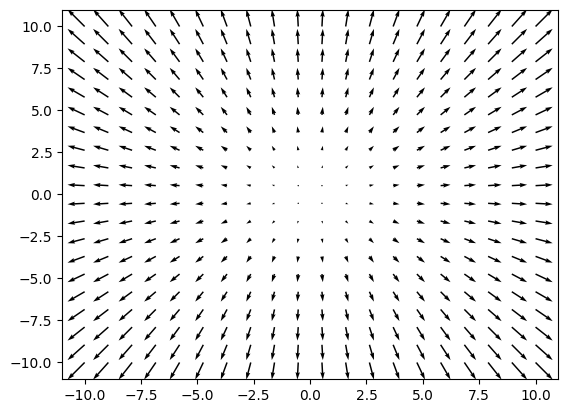

In [ ]:
import matplotlib.pyplot as plt

def get_partials_from_grid(func,g1,g2):
    U =  np.zeros(g1.shape) # df/dx
    V =  np.zeros(g2.shape) # df/dy
    for rows_id,(row_x,row_y) in enumerate(zip(g1,g2)):
        for col_id,(x,y) in enumerate(zip(row_x,row_y)):
            fx,fy = get_partials(func, x, y)
            U[rows_id,col_id] = fx
            V[rows_id,col_id] = fy

    return U,V

def plot_gradients(g1,g2,U,V):
    fig,ax=plt.subplots()
    q=ax.quiver(g1,g2,U,V)
    plt.show()


axis_lim = 10
g1, g2 = get_grid(axis_lim)

func = lambda x,y: x**2 + y**2
U,V = get_partials_from_grid(func,g1,g2)
plot_gradients(g1 ,g2 ,U ,V )


### Homework:

In [ ]:
func = lambda x, y: x**2 + y**2
# implement gradient descent and find the best values of x and y